In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option('display.max_columns', 22)
pd.set_option('display.max_rows',2000)

In [12]:
dataset = pd.read_csv("data/original.csv",encoding='latin1',index_col=0) 
dataset.shape

(11113, 22)

In [13]:
dataset.isnull().sum().to_frame('NA count')
NA_ratio = pd.DataFrame(data=dataset.isnull().sum()/len(dataset),columns=['NA_ratio'])
print(NA_ratio)

          NA_ratio
DateTime  0.000000
HomeTeam  0.000000
AwayTeam  0.000000
FTHG      0.000000
FTAG      0.000000
FTR       0.000000
HTHG      0.083146
HTAG      0.083146
HTR       0.083146
Referee   0.254117
HS        0.254117
AS        0.254117
HST       0.254117
AST       0.254117
HC        0.254117
AC        0.254117
HF        0.254117
AF        0.254117
HY        0.254117
AY        0.254117
HR        0.254117
AR        0.254117


In [14]:
# 2000년 이후의 행만 추리기 
dataset = dataset.drop(dataset.index[:2826], axis = 0 )
dataset

,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
Season,,,,,,,,,,,,,,,,,,,,,,
2001-02,2001-08-18T00:00:00Z,Charlton,Everton,1,2,A,0.0,0.0,D,N. S. Barry,8.0,12.0,4.0,9.0,4.0,4.0,15.0,17.0,0.0,3.0,0.0,0.0
2001-02,2001-08-18T00:00:00Z,Derby,Blackburn,2,1,H,1.0,0.0,H,P. A. Durkin,7.0,14.0,3.0,4.0,4.0,10.0,14.0,15.0,1.0,0.0,0.0,0.0
2001-02,2001-08-18T00:00:00Z,Leeds,Southampton,2,0,H,0.0,0.0,D,C. R. Wilkes,16.0,11.0,6.0,6.0,10.0,3.0,16.0,24.0,1.0,2.0,0.0,1.0
2001-02,2001-08-18T00:00:00Z,Leicester,Bolton,0,5,A,0.0,4.0,A,R. Styles,6.0,18.0,1.0,8.0,3.0,5.0,21.0,17.0,4.0,3.0,0.0,0.0
2001-02,2001-08-18T00:00:00Z,Liverpool,West Ham,2,1,H,1.0,1.0,D,J. T. Winter,9.0,3.0,6.0,3.0,5.0,3.0,13.0,12.0,1.0,5.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-22,2022-04-09T17:30:00Z,Aston Villa,Tottenham,0,4,A,0.0,1.0,A,G Scott,9.0,11.0,8.0,5.0,9.0,3.0,12.0,14.0,2.0,3.0,0.0,0.0
2021-22,2022-04-10T14:00:00Z,Brentford,West Ham,2,0,H,0.0,0.0,D,M Atkinson,15.0,5.0,7.0,1.0,4.0,6.0,2.0,6.0,0.0,1.0,0.0,0.0
2021-22,2022-04-10T14:00:00Z,Leicester,Crystal Palace,2,1,H,2.0,0.0,H,R Jones,12.0,11.0,3.0,3.0,3.0,4.0,11.0,12.0,1.0,1.0,0.0,0.0


In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7909 entries, 2001-02 to 2021-22
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DateTime  7909 non-null   object 
 1   HomeTeam  7909 non-null   object 
 2   AwayTeam  7909 non-null   object 
 3   FTHG      7909 non-null   int64  
 4   FTAG      7909 non-null   int64  
 5   FTR       7909 non-null   object 
 6   HTHG      7909 non-null   float64
 7   HTAG      7909 non-null   float64
 8   HTR       7909 non-null   object 
 9   Referee   7909 non-null   object 
 10  HS        7909 non-null   float64
 11  AS        7909 non-null   float64
 12  HST       7909 non-null   float64
 13  AST       7909 non-null   float64
 14  HC        7909 non-null   float64
 15  AC        7909 non-null   float64
 16  HF        7909 non-null   float64
 17  AF        7909 non-null   float64
 18  HY        7909 non-null   float64
 19  AY        7909 non-null   float64
 20  HR        7909 non-null   

#### TODO
- 홈경기일 때 더 이길 확률이 높아지나?  -> 그러면 홈팀일 때 가중치를 더 주자는 결론  (완료)
- 전반의 결과와 최종 결과 간의 관계 -> 딱히 영향을 안주면 제거 (완료)
- 슈팅과 유효슈팅 간 관계 ex) 슈팅이 많으면 유효슈팅도 많은가?
- 슈팅이 많으면 경기에서 이길까? -> 그렇다면 슈팅 칼럼을 포함해야한다. 
- 유효슈팅이 많으면 경기에서 이길까?  -> 그렇다면 유효슈팅 칼럼은 포함해야함 
- 파울을 많이 하면 경기에서 질까? -> 파울 칼럼도 결과에 영향을 주므로 포함해야한다. 
- 옐로 카드 / 레드 카드를 받은 팀은 경기에서 지나? -> 카드 칼럼도 추가해야함.
- 심판의 성향도 영향을 주나? 


#### 데이터 분석 용도
- 팀 별로 유독 강한 상대팀이 있을까?  
- EPL에서 가장 많은 경기를 뛴 팀은? (완료)

### 1. 전반 결과와 최종 결과가 같은지? 
- 전반이랑 최종 결과가 같은 경우가 60% 정도 되는데 이를 다르게 말하면 10경기중 4경기는 전반과 후반의 결과가 다르다는 의미.
- 10경기 중 6경기는 최종 결과만 가져가도 괜찮지만 아닌 경우도 생긴다.

In [16]:
total = dataset.groupby('Season')['FTR'].count().rename('total_game')
htr = dataset[dataset['FTR'] == dataset['HTR']].groupby(['Season'])['FTR'].count().rename("half_correct")
results = pd.concat([total,htr], axis=1).reset_index()
results['correct_rate'] = results['half_correct'] / results['total_game'] * 100

print("전반 결과와 최종 결과가 같을 확률 : ",results['correct_rate'].mean())

전반 결과와 최종 결과가 같을 확률 :  60.351485509891226


### 2. Home경기일 때 승리할 확률이 높은가?

In [25]:
total = dataset.groupby('Season')['FTR'].count().rename('total_game')
# 홈일 때 이기는 경기 수 
home_win = dataset[dataset['FTR'] == "H"].groupby(['Season'])['FTR'].count().rename("home_win")
# 홈일 때 이기거나 비기는 경기 수 
home_win_draw = dataset[(dataset['FTR'] == "H") | (dataset['FTR'] == 'D')].groupby(['Season'])['FTR'].count().rename('home_win_draw')


new_df = pd.concat([total,home_win,home_win_draw],axis = 1).reset_index()
new_df['home_win_rate'] = new_df['home_win'] / new_df['total_game']
new_df['home_win_draw_rate'] = new_df['home_win_draw'] / new_df['total_game']
# new_df


print("홈 경기일 때 홈 팀이 이길 확률 : ", new_df['home_win_rate'].mean())
print("홈 경기일 때 홈 팀이 이기거나 비길 확률 : ", new_df['home_win_draw_rate'].mean())

홈 경기일 때 홈 팀이 이길 확률 :  0.45725194864183105
홈 경기일 때 홈 팀이 이기거나 비길 확률 :  0.705941634020326


### 2-1. 시즌별 Home win, Away win, Draw 비중 그래프로 확인 

In [165]:
total = dataset.groupby(['Season'])['FTR'].count().rename("total_game")

home_win = dataset[dataset['FTR'] == "H"].groupby(['Season'])['FTR'].count().rename('home_win')
draw = dataset[dataset['FTR'] == "D"].groupby(['Season'])['FTR'].count().rename('draw')
away_win = dataset[dataset['FTR'] == "A"].groupby(['Season'])['FTR'].count().rename('away_win')

new_df = pd.concat([total,home_win,draw,away_win], axis = 1).reset_index()
new_df['home_win_rate'] = new_df['home_win'] / new_df['total_game']
new_df['draw_rate'] = new_df['draw'] / new_df['total_game']
new_df['away_win_rate'] = new_df['away_win'] / new_df['total_game']


new_df

,Season,total_game,home_win,draw,away_win,home_win_rate,draw_rate,away_win_rate
0,2001-02,380,165,101,114,0.434211,0.265789,0.300000
1,2002-03,380,187,90,103,0.492105,0.236842,0.271053
2,2003-04,380,167,108,105,0.439474,0.284211,0.276316
3,2004-05,380,173,110,97,0.455263,0.289474,0.255263
4,2005-06,380,192,77,111,0.505263,0.202632,0.292105
5,2006-07,380,182,98,100,0.478947,0.257895,0.263158
6,2007-08,380,176,100,104,0.463158,0.263158,0.273684
7,2008-09,380,173,97,110,0.455263,0.255263,0.289474
8,2009-10,380,193,96,91,0.507895,0.252632,0.239474
9,2010-11,380,179,111,90,0.471053,0.292105,0.236842


21


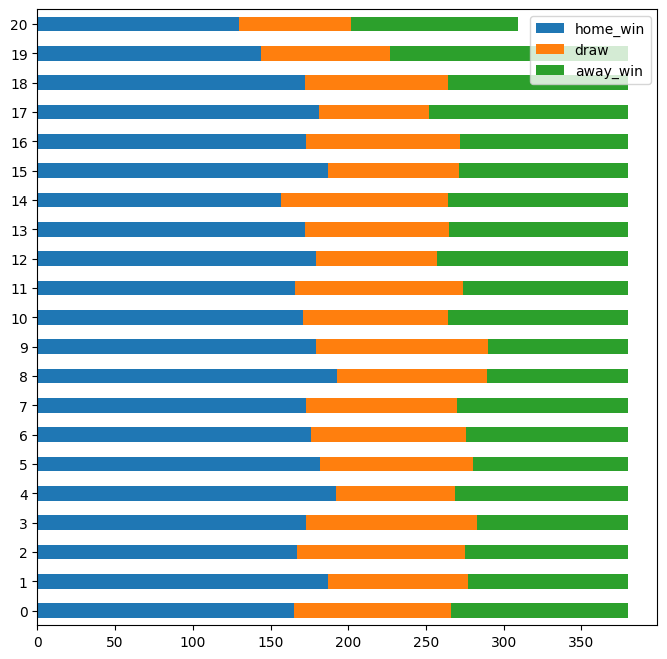

In [166]:
season = [int(i[:4])for i in new_df['Season'].to_list()]
new_df.iloc[:,2:5].plot(kind = 'barh',figsize= (8,8), stacked= True, yticks=season)
print(len(season))

### 3. 슈팅과 유효슈팅 간 관계

In [ ]:
dataset.head()

In [ ]:
shots = dataset.loc[:, ['HS','AS','HST','AST']]
shots.corr()

In [ ]:
shots.iloc[:,[0,2]].corr()

In [ ]:
shots.iloc[:,[1,3]].corr()

In [ ]:
shots = dataset.loc[:, ['HS','AS','HST','AST']]
# 팀 나누지말고 just 슈팅과 유효슛의 관계
shots['total_shot'] = shots['HS'] + shots['AS']
shots['total_target_shot'] = shots['HST'] + shots['AST']
shots = shots.drop(columns=['HS','AS','HST','AST'], axis = 1)
# shots.astype(int)

### 4. 유효슈팅과 결과 간의 관계

- 가설 : 유효슈팅이 많은 팀이 이긴다.


In [ ]:
# target_shot = pd.DataFrame(columns=['result'])
# target_shot
st = dataset.loc[:,['FTR','HST','AST']]
st['result'] =pd.Series() # 빈 칼럼 추가 

st.loc[st['HST'] > st['AST'],'result'] = 'H'
st.loc[st['HST'] < st['AST'], 'result'] = 'A'
st.loc[st['HST'] == st['AST'] , 'result'] = 'D'


target_shot = st[(st['FTR'] == st['result']) & (st['result'] != 'D')]
# target_shot = st[(st['FTR'] == st['result'])]
target_shot


# plt.pie(st.shape, target_shot.shape)


In [ ]:
shot_result = dataset.loc[:,['FTR','HST','AST']]
# shot_result.loc[shot_result['FTR'] == "H", 'FTR'] = 1 
# shot_result.loc[shot_result['FTR'] == "A", "FTR"] = 2
# shot_result.loc[(shot_result['FTR'] != 1) & (shot_result['FTR'] != 2), 'FTR'] = 0

In [ ]:
shot_result.shape

In [ ]:

print("AWAY가 이긴 경기 : ",shot_result.loc[shot_result['FTR'] == "A"]['FTR'].count())
print("AWAY 유효슛이 많으면서 이긴 경우 : ", shot_result.loc[(shot_result['FTR'] == "A") & (shot_result['HST'] < shot_result['AST'])]['FTR'].count())
print()

print("HOME이 이긴 경기 : ",shot_result.loc[shot_result['FTR'] == "H"]['FTR'].count())
print("HOME의 유효슛이 많으면서 이긴 경우 : ", shot_result.loc[(shot_result['FTR'] == "H") & (shot_result['HST'] > shot_result['AST'])]['FTR'].count())
print()

# print("DRAW")
# print(shot_result[(shot_result['FTR'] == "D") & (shot_result['HST'] > shot_result['AST']) ].count())
# print(shot_result[(shot_result['FTR'] == "D") & (shot_result['HST'] < shot_result['AST']) ].count())
# print(shot_result[(shot_result['FTR'] == "D") & (shot_result['HST'] == shot_result['AST']) ].count())


### 4. EPL에서 가장 많은 경기를 뛴 팀은?

In [201]:
home = dataset['HomeTeam'].value_counts()
away = dataset['AwayTeam'].value_counts()
enter_game = home + away 

enter_game = pd.DataFrame(enter_game.sort_values(ascending= False)[:10],columns=["enter_game"])
print(enter_game)
print()

home_score = dataset.groupby('HomeTeam')['FTHG'].sum()
away_score = dataset.groupby('AwayTeam')['FTAG'].sum()
goal_game = home_score + away_score
goal_game = pd.DataFrame(goal_game.sort_values(ascending=False)[:10],columns=['total_goal'])
print(goal_game)

             enter_game
Liverpool           791
Tottenham           791
Man United          791
Everton             790
Chelsea             790
Arsenal             790
Man City            753
Newcastle           715
West Ham            678
Aston Villa         677

             total_goal
HomeTeam               
Arsenal            1482
Man United         1475
Chelsea            1458
Liverpool          1430
Man City           1410
Tottenham          1263
Everton            1047
Newcastle           889
West Ham            854
Aston Villa         810


### 팀 별로 유독 강한 팀이 있을까? 

In [152]:
hometeam = dataset[dataset['FTR'] == "H"].groupby(['HomeTeam','AwayTeam'])
awayteam = dataset[dataset['FTR'] == "A"].groupby(['HomeTeam','AwayTeam'])

# hometeam.first() 
home_away = pd.DataFrame(hometeam['AwayTeam'].count())
away_home = pd.DataFrame(awayteam['HomeTeam'].count())


In [184]:
away_home.shape

(899, 1)